In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

%precision 3
%matplotlib inline

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# --- 함수 정의 ---

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

def V(X, g=lambda x: x): 
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

def check_prob(X): 
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6) 
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X) :.4}')
    print(f'variance {(V(X)):.4}')

def plot_prob(X): 
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label='prob', alpha=0.6, color='skyblue') 
    ax.vlines(E(X), 0, prob.max() * 1.1, label='mean', color='red', linestyle='--') 
    ax.set_xticks(np.append(x_set, round(E(X), 2)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.set_title('Discrete Probability Distribution and Mean')
    ax.set_xlabel('Value (x)')
    ax.set_ylabel('Probability P(X=x)')
    ax.legend()
    plt.show()

# --- X 변수 정의 (이 부분이 핵심입니다!) ---

# 1. 값 집합
x_set_die = np.array([1, 2, 3, 4, 5, 6])

# 2. 확률 함수
def f_die(x):
    if x in x_set_die:
        return 1/6
    return 0

# 3. X 변수에 (값 집합, 함수) 튜플을 할당
X = (x_set_die, f_die)

In [29]:
import numpy as np

def Bern(p):
    """
    베르누이 분포 Bern(p)를 정의하고 (x_set, f) 튜플을 반환합니다.
    p: 성공 확률 (1일 확률)
    """
    x_set = np.array([0, 1])
    
    def f(x): 
        if x in x_set: 
            # P(X=x) = p^x * (1-p)^(1-x)
            return p ** x * (1 - p) ** (1 - x)
        else: 
            return 0
            
    # 이 줄이 반드시 있어야 Bern(p)가 (x_set, f) 튜플을 반환합니다.
    return x_set, f

In [30]:
p = 0.3
X = Bern(p)

In [31]:
check_prob(X)

expected value 0.3
variance 0.21


In [32]:
rv = stats.bernoulli(p)

In [33]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [34]:
rv.pmf([0,1])

array([0.7, 0.3])

In [35]:
rv.cdf([0, 1])

array([0.7, 1. ])

In [36]:
rv.mean(), rv.var()

(0.300, 0.210)

In [40]:
import numpy as np
from scipy.special import comb

def Bin(n, p):
    """
    이항 분포 B(n, p)를 정의하고 (x_set, f) 튜플을 반환합니다.
    n: 시도 횟수
    p: 성공 확률
    """
    # 가능한 값들의 집합: 0부터 n까지
    x_set = np.arange(n + 1)
    
    def f(x):
        """이항 확률 질량 함수 (PMF)"""
        # x가 정의된 범위 내에 있는지 확인
        if x in x_set:
            # 이항 공식: P(X=x) = (nCx) * p^x * (1-p)^(n-x)
            return comb(n, x) * p**x * (1 - p)**(n - x)
        else:
            return 0
    
    # CRITICAL: 바깥 함수인 Bin(n, p)에서 (x_set, f) 튜플을 반환해야 합니다.
    return x_set, f

In [41]:
n = 10
p = 0.3
X = Bin(n, p)

In [42]:
check_prob(X)

expected value 3.0
variance 2.1


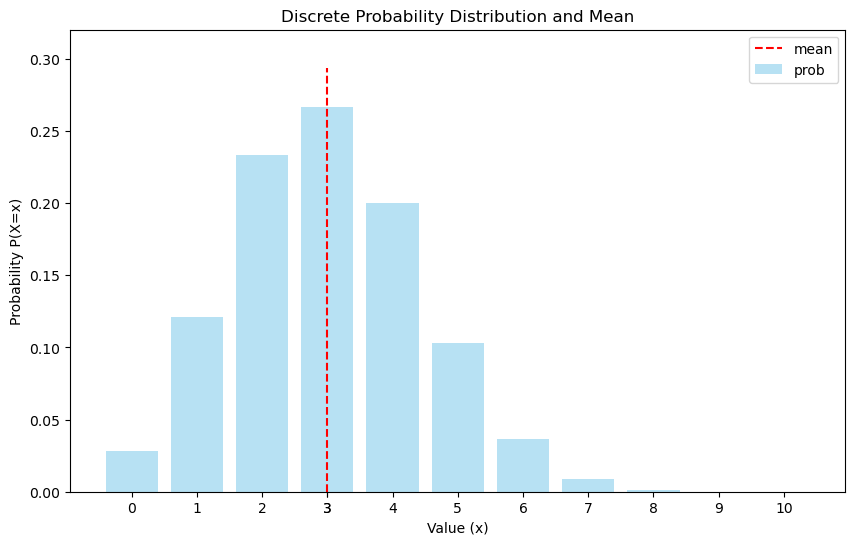

In [43]:
plot_prob(X)

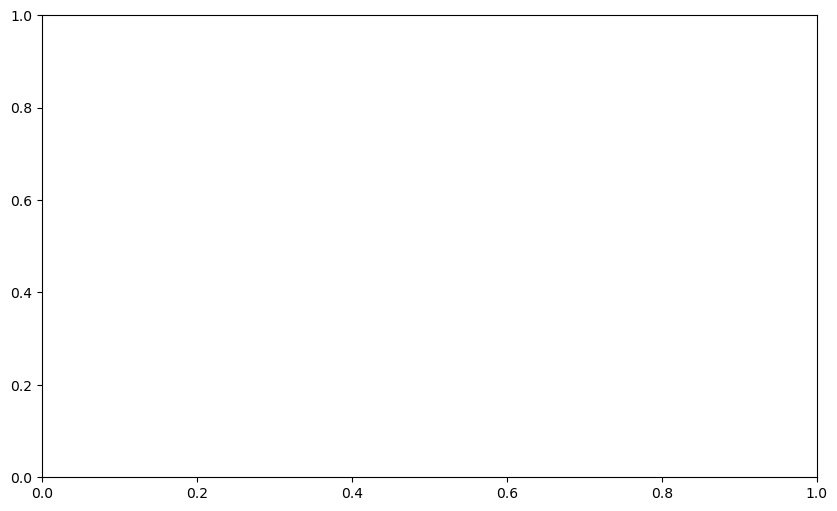

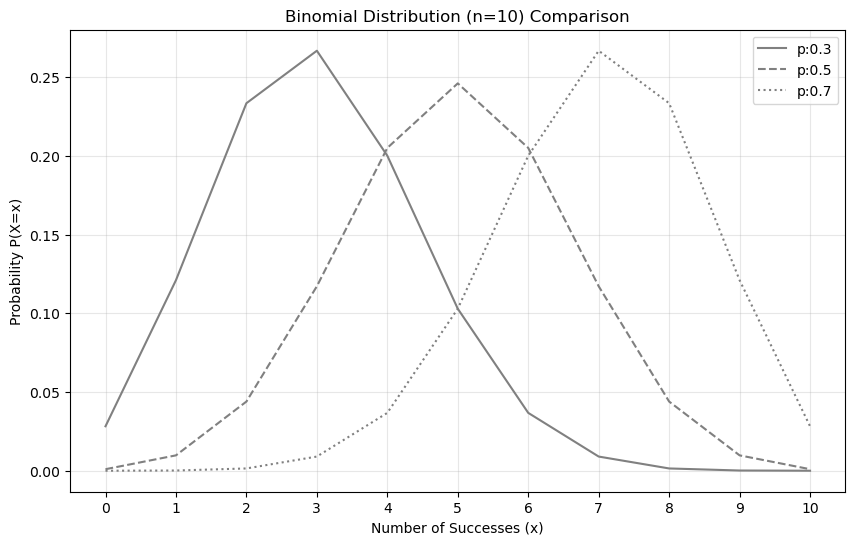

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats # 통계 함수 (이항 분포) 사용을 위해 필요

# ----------------- 실행을 위한 변수 정의 -----------------
# 시도 횟수 (예시 값)
n = 10 
# 그래프 선 스타일 정의 (코드에 사용되었으므로 정의)
linestyles = ['-', '--', ':'] 
# --------------------------------------------------------

# 1. 그래프 영역 설정
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# 2. x축 값 설정 (0부터 n까지)
# np.arrange -> np.arange로 수정
x_set = np.arange(n + 1)

# 3. p 값에 따라 반복하며 그래프 그리기
for p, ls in zip([0.3, 0.5, 0.7], linestyles): 
    # 이항 분포 객체 생성
    rv = stats.binom(n, p)
    
    # PMF (확률 질량 함수) 값을 계산하여 플롯
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')

# 4. 그래프 설정 및 출력
ax.set_xticks(x_set)
ax.set_title(f'Binomial Distribution (n={n}) Comparison')
ax.set_xlabel('Number of Successes (x)')
ax.set_ylabel('Probability P(X=x)')
ax.grid(True, alpha=0.3)
ax.legend()

plt.show()

In [48]:
import numpy as np

def Ge(p):
    """
    기하 분포 Ge(p)를 정의하고 (x_set, f) 튜플을 반환합니다.
    (첫 번째 성공까지 필요한 시도 횟수 X=x, x >= 1)
    p: 성공 확률
    """
    # 1. 가능한 값들의 집합 (x_set): 1부터 29까지 (np.arange(1, 30)은 1부터 29 포함)
    # np.arrange -> np.arange로 수정
    x_set = np.arange(1, 30) 
    
    def f(x):
        """기하 확률 질량 함수 (PMF)"""
        if x in x_set:
            # 기하 분포 공식: P(X=x) = p * (1-p)^(x-1)
            # (x-1번 실패 후 x번째에 성공)
            return p * (1 - p) ** (x - 1)
        else:
            return 0
            
    # CRITICAL: 바깥 함수 Ge(p)에서 (x_set, f) 튜플을 반환해야 합니다.
    return x_set, f

In [49]:
p = 0.5
X = Ge(p)

In [50]:
check_prob(X)

expected value 2.0
variance 2.0


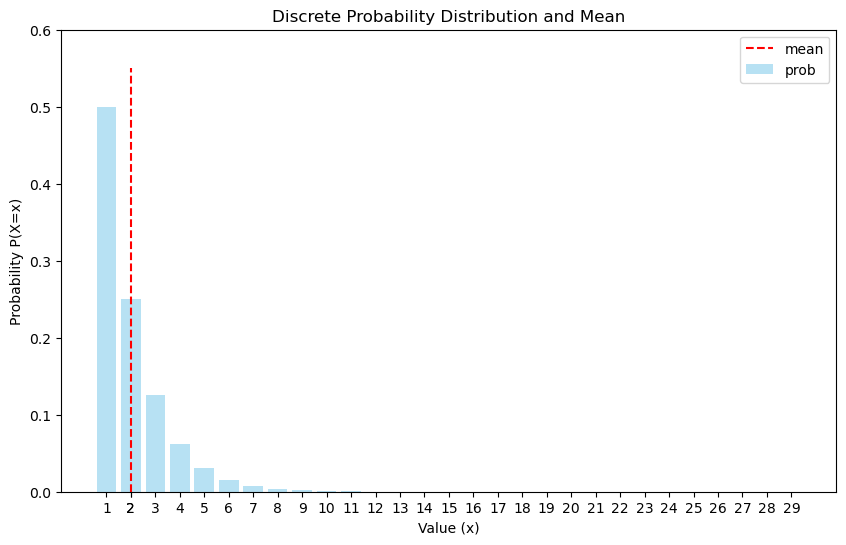

In [51]:
plot_prob(X)

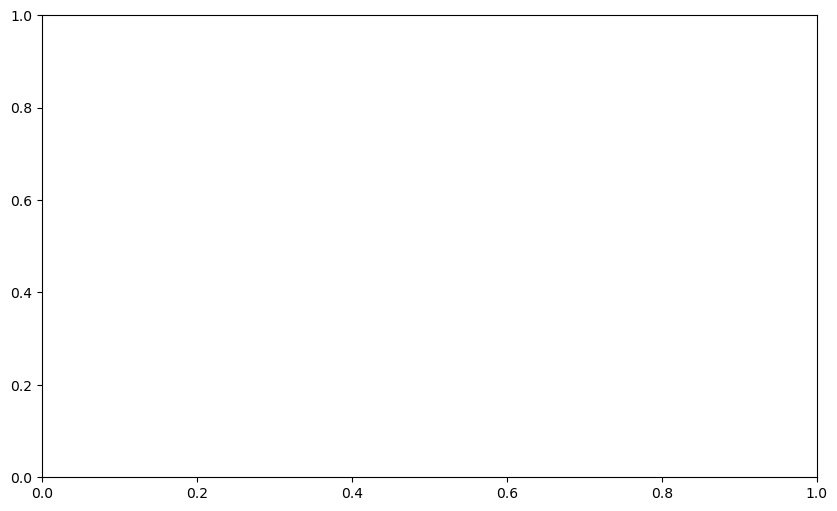

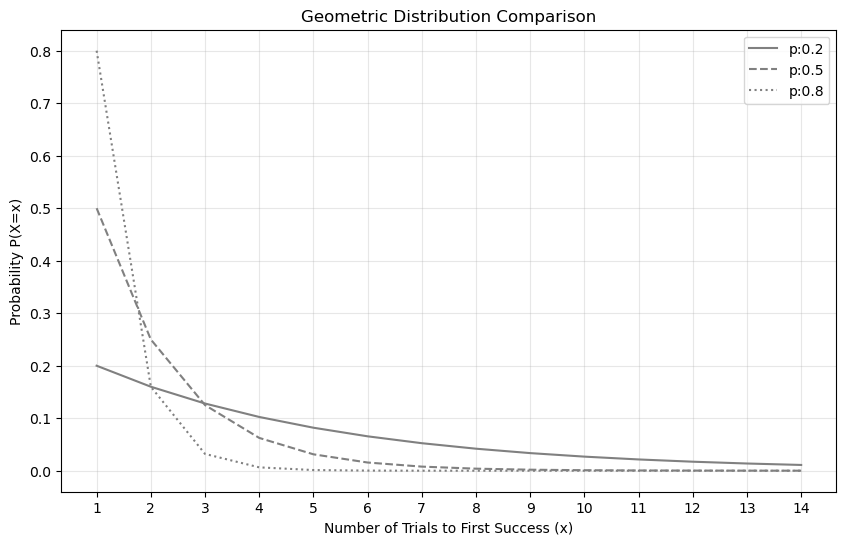

In [53]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 

linestyles = ['-', '--', ':'] 


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)


x_set = np.arange(1, 15)


for p, ls in zip([0.2, 0.5, 0.8], linestyles): 
  
    rv = stats.geom(p)
    
    ax.plot(x_set, rv.pmf(x_set),
            label=f'p:{p}', ls=ls, color='gray')


ax.set_xticks(x_set)
ax.set_title('Geometric Distribution Comparison')
ax.set_xlabel('Number of Trials to First Success (x)')
ax.set_ylabel('Probability P(X=x)')
ax.grid(True, alpha=0.3)
ax.legend()


plt.show()

In [54]:
import numpy as np
from scipy.special import factorial 

def Poi(lam):
    """
    포아송 분포 Poi(lambda)를 정의하고 (x_set, f) 튜플을 반환합니다.
    lambda (lam): 단위 시간/공간당 평균 발생 횟수 (모수)
    """

    x_set = np.arange(20) 
    
    def f(x):
        """포아송 확률 질량 함수 (PMF)"""
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
            
    return x_set, f

In [55]:
lam = 3
X = Poi(lam)

In [56]:
check_prob(X)

expected value 3.0
variance 3.0


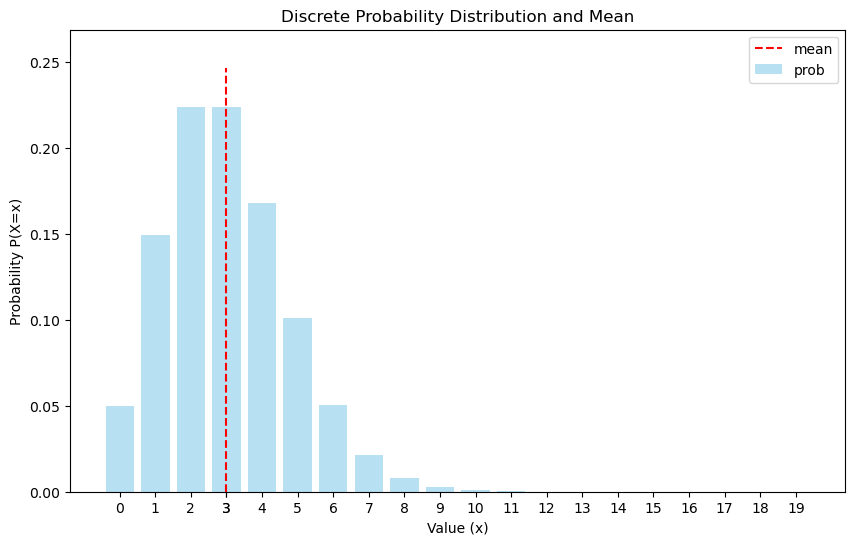

In [57]:
plot_prob(X)

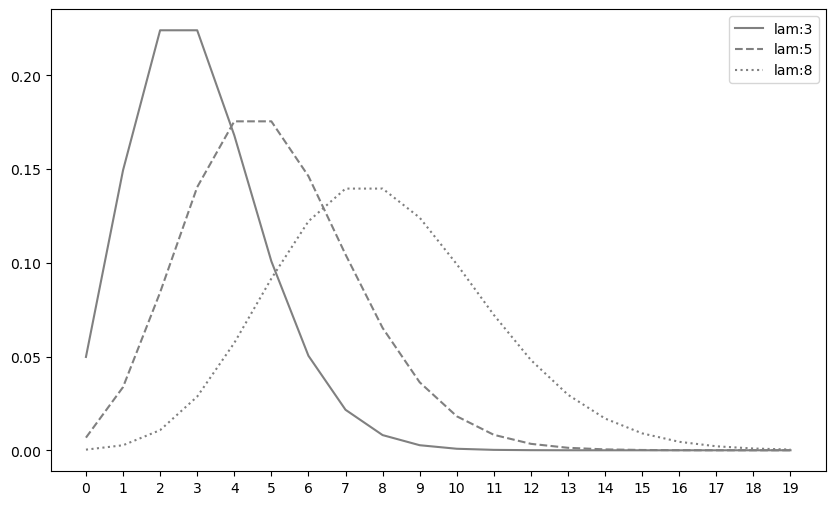

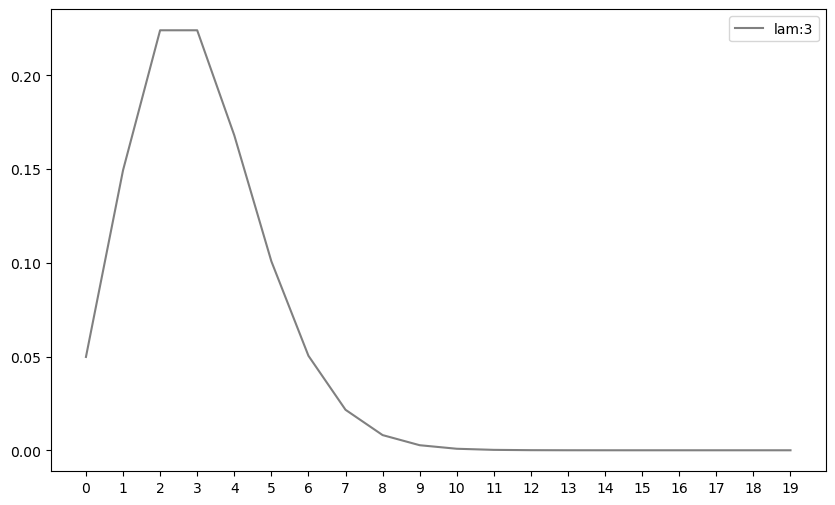

In [59]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(20)
for lam, ls in zip([3, 5, 8], linestyles): 
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
    label=f'lam:{lam}', ls=ls, color='gray')
    ax.set_xticks(x_set)
    ax.legend()

    plt.show()